# Yolo Dataset Toolkit (Short)
### Набор утилит для работы с датасетами и обучению моделей Yolo v8

    - renaming - переименование файлов пар images|labels в train, valid, test наборах (цифровой формат)
    - create_strat_dataset - Формирование стратифицированного датасета (предварительно подготовить датасет в режиме renaming)
    - custom_dataset_analysis  - Оценка распределения классов в кастомном датасете (предварительно подготовить датасет в режиме renaming)


# Выбор режима работы

In [1]:
task_mode = "renaming" 

    # renaming - переименование файлов пар images|labels в train, valid, test наборах 
    # create_strat_dataset - Формирование стратифицированного датасета (предварительно подготовить датасет в режиме renaming)
    # custom_dataset_analysis  - Оценка распределения классов в кастомном датасете (предварительно подготовить датасет в режиме renaming)


In [ ]:
print (f'#'*100)
print (f'###############                   Режим работы: {task_mode}                          ###############')
print (f'#'*100)
print (f'')

In [2]:
import os
import shutil

def clear_directory(path):
    """ Удаление всех файлов в директории. """
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isfile(item_path):
            os.unlink(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)

### Переменные

In [ ]:
# Общие переменные
dataset = "Conbine_dataset_3_classes-2_80-20-10"
project_path = '/home/dev/projects/Object_Detection/helmets'
data_path = project_path + '/datasets/' + dataset
dataset_yaml_path = project_path + '/' + 'data.yaml'
path_to_dataset = data_path

path_to_train = os.path.join(path_to_dataset, "train/")
path_to_train_images = os.path.join(path_to_train, 'images/')
path_to_train_labels = os.path.join(path_to_train, 'labels/')

path_to_valid = os.path.join(path_to_dataset, "valid/")
path_to_valid_images = os.path.join(path_to_valid, 'images/')
path_to_valid_labels = os.path.join(path_to_valid, 'labels/')

path_to_test = os.path.join(path_to_dataset, "test/")
path_to_test_images = os.path.join(path_to_test, 'images/')
path_to_test_labels = os.path.join(path_to_test, 'labels/')

# переменные для renaming

# переменные для create_strat_dataset
val_ratio =  0.2
test_ratio = 0.1

# переменные для custom_dataset_analysis
path_to_train_labels_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/train/labels"
path_to_train_images_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/train/images"
path_to_valid_labels_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/valid/labels"
path_to_valid_images_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/valid/images"
path_to_test_labels_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/test/labels"
path_to_test_images_cus_dataset = "/home/dev/projects/Object_Detection/helmets/datasets/Conbine_dataset_3_classes-2_80-20-10/test/images"

# Создание необходимых папок
for path in [path_to_train, path_to_train_images, path_to_train_labels, \
    path_to_valid, path_to_valid_images, path_to_valid_labels, \
    path_to_test, path_to_test_images, path_to_test_labels]:
    if not os.path.exists(path):
        os.makedirs(path)

# Очистка директорий для наборов данных
# for path in [path_to_train, path_to_valid, path_to_test]:
#     clear_directory(path)


# "renaming" - Переименование файлов пар images|labels в train, valid, test наборах

In [ ]:
# переименование файлов пар images|labels в train, valid, test наборах 
if task_mode == "renaming":
        
    import os

    def read_numbering(data_path):
        numbering_path = os.path.join(data_path, 'numbering.txt')
        if os.path.exists(numbering_path):
            with open(numbering_path, 'r') as file:
                return int(file.read().strip())
        return 1

    def save_numbering(data_path, numbering):
        with open(os.path.join(data_path, 'numbering.txt'), 'w') as file:
            file.write(str(numbering))



    def rename_files(data_path, numbering):
        for dataset in ['train', 'valid', 'test']:
            images_path = os.path.join(data_path, dataset, 'images')
            labels_path = os.path.join(data_path, dataset, 'labels')

            # Проверяем, существуют ли директории
            if not os.path.exists(images_path) or not os.path.exists(labels_path):
                print(f"Directory {dataset} does not exist, skipping.")
                continue

            images = sorted(os.listdir(images_path))
            labels = sorted(os.listdir(labels_path))

            for img, lbl in zip(images, labels):
                img_extension = os.path.splitext(img)[1]
                lbl_extension = os.path.splitext(lbl)[1]

                new_name = f'{numbering:06d}'  # Указание размерности имени файла
                os.rename(os.path.join(images_path, img), os.path.join(images_path, new_name + img_extension))
                os.rename(os.path.join(labels_path, lbl), os.path.join(labels_path, new_name + lbl_extension))

                numbering += 1

        return numbering


    # Path to your data
    # data_path = 'path_to_your_data'

    # Read or initialize numbering
    numbering = read_numbering(data_path)

    # Rename files and update numbering
    numbering = rename_files(data_path, numbering)

    # Save the updated numbering
    save_numbering(data_path, numbering)

# "create_strat_dataset" - Подготовка датасета на основе принципов стратификационного отбора в наборы train/valid/test

In [4]:
if task_mode == "create_strat_dataset":

    import os
    import shutil
    import pandas as pd
    import random


    def create_subset(data, class_list, subset_ratio, ratio_type):
        """ Создание подмножества данных с учетом стратификации по классам. """
        subset_indices = set()
        subset_data = pd.DataFrame(columns=data.columns)
        
        for c in sorted(class_list, key=lambda x: data[x].sum()):
            required_samples = int(data[c].sum() * subset_ratio)
            class_total = 0

            for index, row in data[data[c] > 0].iterrows():
                if class_total + row[c] > required_samples:
                    break
                subset_indices.add(index)
                class_total += row[c]

        # Преобразование множества в список для использования в качестве индексатора
        subset_indices_list = list(subset_indices)

        subset_data = data.loc[subset_indices_list]
        subset_data = subset_data.drop_duplicates().sort_values(by='random_id')

        # Вывод информации о наборе данных
        print(f"Первые строки {'валидационных' if ratio_type == 'validation' else 'тестовых'} данных:\n", subset_data.head())
        print(f"Планируемое количество строк для {'валидации' if ratio_type == 'validation' else 'теста'}:", int(len(data) * subset_ratio))
        print(f"Количество строк в {'валидационных' if ratio_type == 'validation' else 'тестовых'} данных:", len(subset_data))
        for c in class_list:
            print(f"Количество вхождений класса {c} в {'валидационных' if ratio_type == 'validation' else 'тестовых'} данных:", subset_data[c].sum())
        print(f"")
        # Удаление выбранных индексов из исходных данных
        updated_train_data = data.drop(subset_indices)

        return subset_data, updated_train_data

    def create_stratified_datasets(path_to_train_labels, path_to_images, path_to_valid, path_to_test, validation_ratio, test_ratio):
        # Определение расширений изображений
        image_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']

        # Словарь для хранения информации о классах и соответствующих файлах
        class_list = set()
        file_data = []

        # Обработка каждого файла аннотации
        for label_file in os.listdir(path_to_train_labels):
            file_path = os.path.join(path_to_train_labels, label_file)
            base_name = label_file.replace('.txt', '')

            # Нахождение соответствующего файла изображения
            image_file_name = next((base_name + '.' + ext for ext in image_extensions if os.path.exists(os.path.join(path_to_images, base_name + '.' + ext))), None)
            if image_file_name is None:
                continue  # Пропускаем аннотацию, если изображение не найдено

            # Подсчет количества каждого класса в файле
            class_counts = {}
            with open(file_path, 'r') as file:
                for line in file:
                    class_id = line.split()[0]
                    class_list.add(class_id)
                    class_counts[class_id] = class_counts.get(class_id, 0) + 1

            random_id = random.randint(0, 1000000)
            file_data.append([label_file, random_id] + [class_counts.get(c, 0) for c in class_list])

        # Создание DataFrame из собранных данных
        columns = ['label_file', 'random_id'] + list(class_list)
        source_data = pd.DataFrame(file_data, columns=columns)

        # Сортировка DataFrame по random_id
        source_data.sort_values(by='random_id', inplace=True)

        # Формирование валидационного набора
        valid_data, remaining_data = create_subset(source_data, class_list, validation_ratio, 'validation')

        # Формирование тестового набора из оставшихся данных
        adjusted_test_ratio = test_ratio / (1 - validation_ratio)
        test_data, train_data = create_subset(remaining_data, class_list, adjusted_test_ratio, 'test')

        # Перенос файлов в папки наборов данных
        for dataset, path_to_dataset_dir in zip([valid_data, test_data], [path_to_valid, path_to_test]):
            for index, row in dataset.iterrows():
                label_file = row['label_file']
                base_name = label_file.replace('.txt', '')

                # Перенос файла аннотации
                shutil.move(os.path.join(path_to_train_labels, label_file), os.path.join(path_to_dataset_dir, 'labels', label_file))

                # Перенос соответствующего файла изображения
                for ext in image_extensions:
                    image_file = base_name + '.' + ext
                    if os.path.exists(os.path.join(path_to_images, image_file)):
                        shutil.move(os.path.join(path_to_images, image_file), os.path.join(path_to_dataset_dir, 'images', image_file))
                        break  # Прекращаем цикл, если файл найден и перемещен

        return source_data, train_data, valid_data, test_data, class_list

    # Пример вызова функции

    source_data, train_data, validation_data, test_data, class_list = create_stratified_datasets(
        path_to_train_labels, path_to_train_images, path_to_valid, path_to_test, val_ratio, test_ratio)



Первые строки валидационных данных:
       label_file  random_id  1  6    9    3    5    7    8    0    2    4
5983  003201.txt        276  2  0  0.0  2.0  4.0  0.0  1.0  1.0  3.0  2.0
4504  006960.txt        323  0  0  0.0  0.0  2.0  0.0  0.0  0.0  2.0  0.0
290   000425.txt        326  0  0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
439   007087.txt        686  0  0  0.0  0.0  3.0  0.0  0.0  3.0  0.0  0.0
2395  001994.txt        916  0  0  0.0  0.0  2.0  0.0  0.0  2.0  0.0  0.0
Планируемое количество строк для валидации: 1259
Количество строк в валидационных данных: 1267
Количество вхождений класса 1 в валидационных данных: 174
Количество вхождений класса 6 в валидационных данных: 490
Количество вхождений класса 9 в валидационных данных: 216.0
Количество вхождений класса 3 в валидационных данных: 318.0
Количество вхождений класса 5 в валидационных данных: 2781.0
Количество вхождений класса 7 в валидационных данных: 351.0
Количество вхождений класса 8 в валидационных данных: 564.0
Количес

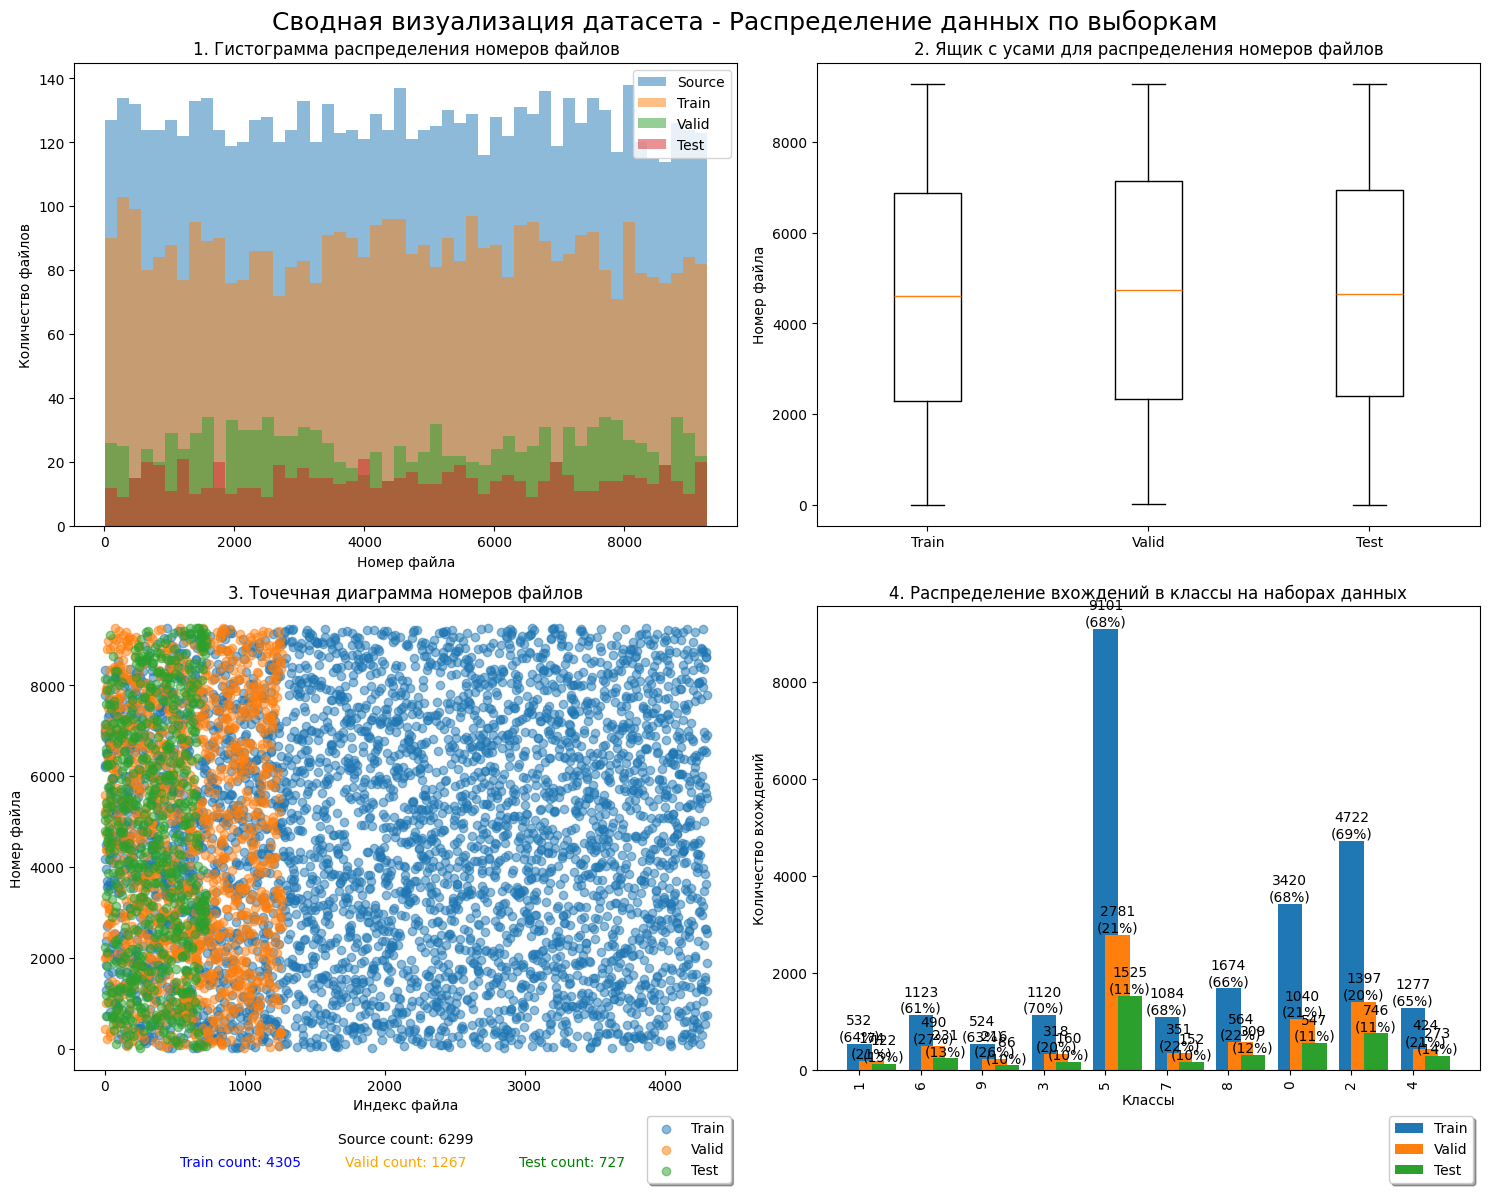

In [5]:
if task_mode == "create_strat_dataset":
    import matplotlib.pyplot as plt
    import pandas as pd
    import os

    def visualize_train_valid_distribution(source_data, train_data, validation_data, test_data, path_to_dataset, class_list):
        # Получение числовых значений из имен файлов
        source_file_numbers = source_data['label_file'].str.replace(r'\.txt', '', regex=True).astype(int)
        train_file_numbers = train_data['label_file'].str.replace(r'\.txt', '', regex=True).astype(int)
        valid_file_numbers = validation_data['label_file'].str.replace(r'\.txt', '', regex=True).astype(int)
        test_file_numbers = test_data['label_file'].str.replace(r'\.txt', '', regex=True).astype(int)
        # test_file_numbers = validation_data['label_file'].str.replace(r'\.txt', '', regex=True).astype(int)

        # Создание фигуры с несколькими подграфиками
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

        # Гистограмма распределения файлов
        axes[0, 0].hist(source_file_numbers, bins=50, alpha=0.5, label='Source')
        axes[0, 0].hist(train_file_numbers, bins=50, alpha=0.5, label='Train')
        axes[0, 0].hist(valid_file_numbers, bins=50, alpha=0.5, label='Valid')
        axes[0, 0].hist(test_file_numbers, bins=50, alpha=0.5, label='Test')
        axes[0, 0].set_title('1. Гистограмма распределения номеров файлов')
        axes[0, 0].set_xlabel('Номер файла')
        axes[0, 0].set_ylabel('Количество файлов')
        axes[0, 0].legend()

        # Ящик с усами для распределения файлов
        axes[0, 1].boxplot([train_file_numbers, valid_file_numbers,test_file_numbers], labels=['Train', 'Valid', 'Test'])
        axes[0, 1].set_title('2. Ящик с усами для распределения номеров файлов')
        axes[0, 1].set_ylabel('Номер файла')

        # Точечная диаграмма для распределения файлов
        # axes[1, 0].scatter(range(len(source_file_numbers)), source_file_numbers, alpha=0.5, label='Source')
        axes[1, 0].scatter(range(len(train_file_numbers)), train_file_numbers, alpha=0.5, label='Train')
        axes[1, 0].scatter(range(len(valid_file_numbers)), valid_file_numbers, alpha=0.5, label='Valid')
        axes[1, 0].scatter(range(len(test_file_numbers)), test_file_numbers, alpha=0.5, label='Test')
        axes[1, 0].set_title('3. Точечная диаграмма номеров файлов')
        axes[1, 0].set_xlabel('Индекс файла')
        axes[1, 0].set_ylabel('Номер файла')
        axes[1, 0].legend()
        # axes[1, 0].legend(loc='lower left', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
        axes[1, 0].legend(loc='lower right', bbox_to_anchor=(1, -0.26), fancybox=True, shadow=True, ncol=1)

        # Добавление аннотаций с количеством файлов
        source_count = len(source_file_numbers)
        train_count = len(train_file_numbers)
        valid_count = len(valid_file_numbers)
        test_count = len(test_file_numbers)
        axes[1, 0].annotate(f'Source count: {source_count}', xy=(0.5, -0.15), xycoords='axes fraction', 
                            ha='center', va='center', fontsize=10, color='black')
        axes[1, 0].annotate(f'Train count: {train_count}', xy=(0.25, -0.2), xycoords='axes fraction', 
                            ha='center', va='center', fontsize=10, color='blue')
        axes[1, 0].annotate(f'Valid count: {valid_count}', xy=(0.5, -0.2), xycoords='axes fraction', 
                            ha='center', va='center', fontsize=10, color='orange')
        axes[1, 0].annotate(f'Test count: {test_count}', xy=(0.75, -0.2), xycoords='axes fraction', 
                            ha='center', va='center', fontsize=10, color='green')

        # График распределения классов
        # Подсчет количества вхождений каждого класса в исходном наборе данных
        source_class_counts = source_data[class_list].sum()
        # Подсчет количества вхождений каждого класса в валидационном наборе данных
        train_class_counts = train_data[class_list].sum()
        vaild_class_counts = validation_data[class_list].sum()
        test_class_counts = test_data[class_list].sum()
        # Процентное соотношение валидационных данных к исходным
        train_percentage_ratio = (train_class_counts / source_class_counts * 100).fillna(0)
        vaild_percentage_ratio = (vaild_class_counts / source_class_counts * 100).fillna(0)
        test_percentage_ratio = (test_class_counts / source_class_counts * 100).fillna(0)
        labels = class_list
        # source_counts = source_class_counts.values
        train_counts = train_class_counts.values
        vaild_counts = vaild_class_counts.values
        test_counts = test_class_counts.values
        x = range(len(labels))  # метки по оси X
            
        offset = 0.2  # Смещение для столбцов тестового набора
        x_test = [xi + offset for xi in x]  # Создаем новые позиции для столбцов тестового набора
        # axes[1, 1].bar(x, source_counts, width=0.4, label='Source (Исходный)', align='center')
        axes[1, 1].bar(x, train_counts, width=0.4, label='Train', align='center')
        axes[1, 1].bar(x, vaild_counts, width=0.4, label='Valid', align='edge')
        axes[1, 1].bar(x_test, test_counts, width=0.4, label='Test', align='edge')
        # Вывод значения над столбцами
        for i in range(len(labels)):
            # plt.text(i, source_counts[i], f'{source_counts[i]:.0f}', ha='center', va='bottom')
            plt.text(i, train_counts[i], f'{train_counts[i]:.0f}\n({train_percentage_ratio[i]:.0f}%)', ha='center', va='bottom')
            plt.text(i+0.2, vaild_counts[i], f'{vaild_counts[i]:.0f}\n({vaild_percentage_ratio[i]:.0f}%)', ha='center', va='bottom')
            plt.text(i+0.4, test_counts[i], f'{test_counts[i]:.0f}\n({test_percentage_ratio[i]:.0f}%)', ha='center', va='bottom')

        axes[1, 1].set_title('4. Распределение вхождений в классы на наборах данных')
        axes[1, 1].set_xlabel('Классы')
        axes[1, 1].set_ylabel('Количество вхождений')
        axes[1, 1].set_xticks(x)
        axes[1, 1].set_xticklabels(labels, rotation='vertical')
        axes[1, 1].legend(loc='lower right', bbox_to_anchor=(1, -0.26), fancybox=True, shadow=True, ncol=1)

        # Добавление общего заголовка для всех графиков
        fig.suptitle('Сводная визуализация датасета - Распределение данных по выборкам', fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Адаптация layout под заголовок

        # Сохранение графиков в один файл
        plt.tight_layout()
        graph_path = os.path.join(path_to_dataset, 'combined_distribution_plots.png')
        plt.savefig(graph_path)
        plt.show()
        plt.close()


    # Пример вызова функции
    class_list = source_data.columns[2:].tolist()  # Пример получения списка классов
    visualize_train_valid_distribution(source_data, train_data, validation_data, test_data, path_to_dataset, class_list)


# "custom_dataset_analysis" - Анализ кастомного датасета на предмет вхождения классов в выборки

In [ ]:
if task_mode == "create_strat_dataset":
    import os
    import pandas as pd
    import random

    def scan_annotation_folder(path_to_labels, path_to_images, class_list):
        image_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']
        file_data = []

        for label_file in os.listdir(path_to_labels):
            file_path = os.path.join(path_to_labels, label_file)
            base_name = label_file.replace('.txt', '')

            image_file_name = next((base_name + '.' + ext for ext in image_extensions if os.path.exists(os.path.join(path_to_images, base_name + '.' + ext))), None)
            if image_file_name is None:
                continue

            class_counts = {}
            with open(file_path, 'r') as file:
                for line in file:
                    class_id = line.split()[0]
                    class_list.add(class_id)
                    class_counts[class_id] = class_counts.get(class_id, 0) + 1

            # random_id = random.randint(0, 1000000)
            random_id = base_name
            file_data.append([label_file, random_id] + [class_counts.get(c, 0) for c in class_list])

        return file_data

    def create_datasets_dataframes(path_to_train_labels, path_to_train_images, path_to_valid_labels, path_to_valid_images, path_to_test_labels, path_to_test_images):
        class_list = set()

        # Сканирование train, valid, test папок
        train_data = scan_annotation_folder(path_to_train_labels, path_to_train_images, class_list)
        valid_data = scan_annotation_folder(path_to_valid_labels, path_to_valid_images, class_list)
        test_data = scan_annotation_folder(path_to_test_labels, path_to_test_images, class_list)

        # Создание DataFrame для каждого набора данных
        columns = ['label_file', 'random_id'] + list(class_list)
        train_df = pd.DataFrame(train_data, columns=columns)
        valid_df = pd.DataFrame(valid_data, columns=columns)
        test_df = pd.DataFrame(test_data, columns=columns)

        # Сортировка DataFrame по random_id
        train_df.sort_values(by='random_id', inplace=True)
        valid_df.sort_values(by='random_id', inplace=True)
        test_df.sort_values(by='random_id', inplace=True)

        return train_df, valid_df, test_df

    # Пример вызова функции
    cus_train_data, cus_validation_data, cus_test_data = create_datasets_dataframes(
        path_to_train_labels_cus_dataset, path_to_train_images_cus_dataset, path_to_valid_labels_cus_dataset, path_to_valid_images_cus_dataset, path_to_test_labels_cus_dataset, path_to_test_images_cus_dataset)
    
    class_list = source_data.columns[2:].tolist()  # Пример получения списка классов
    visualize_train_valid_distribution(source_data, cus_train_data, cus_validation_data, cus_test_data, path_to_dataset, class_list)